<a href="https://colab.research.google.com/github/BhattacharyaSumit/DAAD-WISE-IRL/blob/main/DAAD_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%config InlineBackend.figure_format = 'retina'

In [ ]:
!git clone  https://github.com/cvlab-stonybrook/Scanpath_Prediction

Cloning into 'Scanpath_Prediction'...
remote: Enumerating objects: 214, done.
remote: Counting objects: 100% (214/214), done.
remote: Compressing objects: 100% (165/165), done.
remote: Total 214 (delta 121), reused 103 (delta 44), pack-reused 0
Receiving objects: 100% (214/214), 28.01 MiB | 32.82 MiB/s, done.
Resolving deltas: 100% (121/121), done.


In [ ]:
cp -R  /content/drive/MyDrive/processed /content/Scanpath_Prediction

In [ ]:
import matplotlib.pyplot as plt
import cv2

In [ ]:
import torch
hr_path ='/content/Scanpath_Prediction/processed/DCBs/HR/car/000000063353.pth.tar'
lr_path ='/content/Scanpath_Prediction/processed/DCBs/LR/car/000000063353.pth.tar'

In [ ]:
my_path = '/content/drive/MyDrive/images/' + 'car' + '/' + '000000063353.jpg'

In [ ]:
image = cv2.imread(my_path)

In [ ]:
pp = plt.imread(my_path)
plt.imshow(pp)
plt.axis('off')
plt.show()

In [ ]:
image.shape

(1050, 1680, 3)

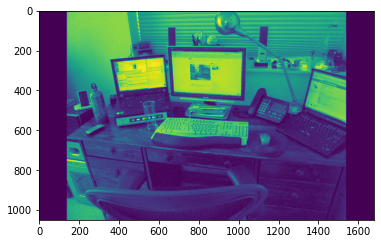

In [ ]:
plt.imshow(image[:,:,2])

In [ ]:
lr =torch.load(lr_path)
hr = torch.load(hr_path)

In [ ]:
hm , lm =  [] ,  []
for i in range(hr.size(0)):
  if hr[i].sum() != 0:
    hm.append(i)
  if lr[i].sum() != 0:
    lm.append(i)

In [ ]:
hr.size()

torch.Size([134, 20, 32])

In [ ]:
print(hm)
print(lm)

[2, 72, 113, 118, 123, 124, 126, 132]
[2, 72, 118, 123, 124, 126, 132]


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def myplot(hr, hm, lr, lm, i):
  fig, ax = plt.subplots(1,2, figsize=(15,15))
  ax[0].imshow(hr[hm[-i]], cmap='cividis')
  #ax[0].axis('off')
  ax[1].imshow(lr[lm[-i]], cmap='cividis')
  #ax[1].axis('off')
  
  plt.show()

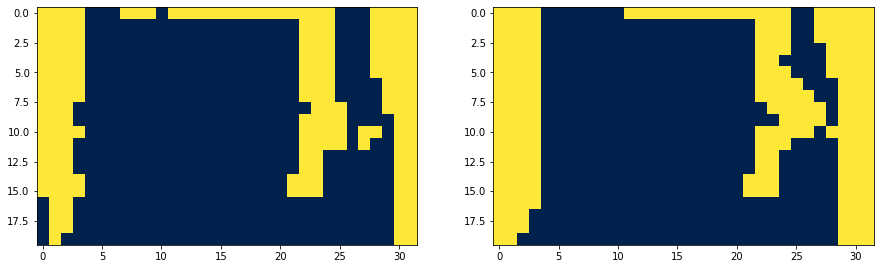

In [ ]:
myplot(hr, hm, lr, lm, 1)

In [ ]:
aa = hr[hm[-1]].numpy()

In [ ]:
resized = cv2.resize(aa, (1680, 1050), interpolation = cv2.INTER_AREA)

In [ ]:
resized.shape

(1050, 1680)

In [ ]:
image = plt.imread(my_path)


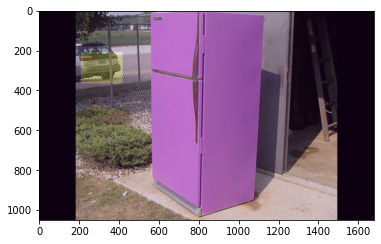

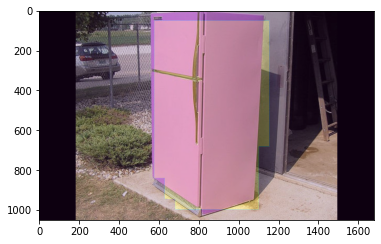

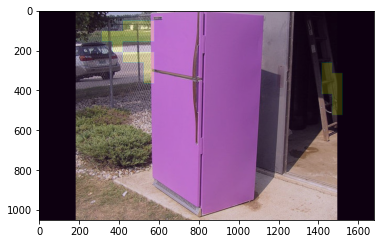

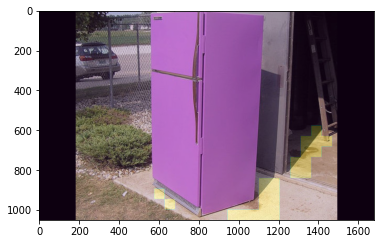

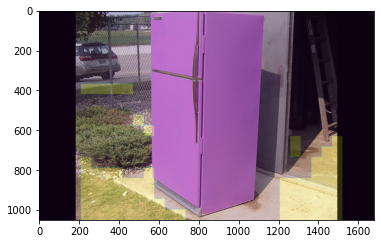

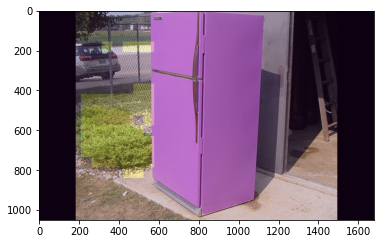

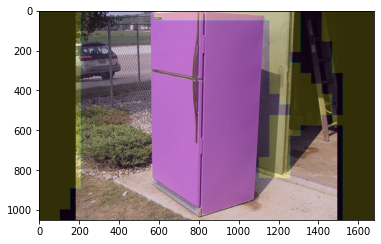

In [ ]:
for a in lm:
  plt.imshow(image)
  aa = lr[a].numpy()
  resized = cv2.resize(aa, (1680, 1050), interpolation = cv2.INTER_AREA)
  plt.imshow(resized, alpha = 0.2)
  plt.show()

In [ ]:
check = image 
check[:,:,1] = resized

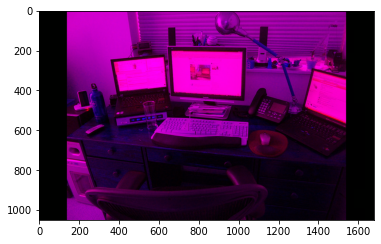

In [ ]:
plt.imshow(check)

In [ ]:
CLASSES = [
    'N/A', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A',
    'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse',
    'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack',
    'umbrella', 'N/A', 'N/A', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis',
    'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove',
    'skateboard', 'surfboard', 'tennis racket', 'bottle', 'N/A', 'wine glass',
    'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich',
    'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake',
    'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table', 'N/A',
    'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard',
    'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A',
    'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier',
    'toothbrush'
]

In [ ]:
import os

In [ ]:
abc = os.listdir("/content/drive/MyDrive/images")
abc.pop(0)

'.DS_Store'

In [ ]:
set(CLASSES).intersection(abc)

{'bottle',
 'bowl',
 'car',
 'chair',
 'clock',
 'cup',
 'fork',
 'keyboard',
 'knife',
 'laptop',
 'microwave',
 'mouse',
 'oven',
 'potted plant',
 'sink',
 'stop sign',
 'toilet',
 'tv'}

In [ ]:
from PIL import Image
import requests
import io
import math
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

import torch
from torch import nn
from torchvision.models import resnet50
import torchvision.transforms as T
import numpy
torch.set_grad_enabled(False);

In [ ]:
transform = T.Compose([
    T.Resize(800),
    T.ToTensor(),
    T.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

In [ ]:
model, postprocessor = torch.hub.load('facebookresearch/detr', 'detr_resnet101_panoptic', pretrained=True, return_postprocessor=True, num_classes=250)
model.eval();

Using cache found in /root/.cache/torch/hub/facebookresearch_detr_master


In [ ]:
im = Image.open(my_path)

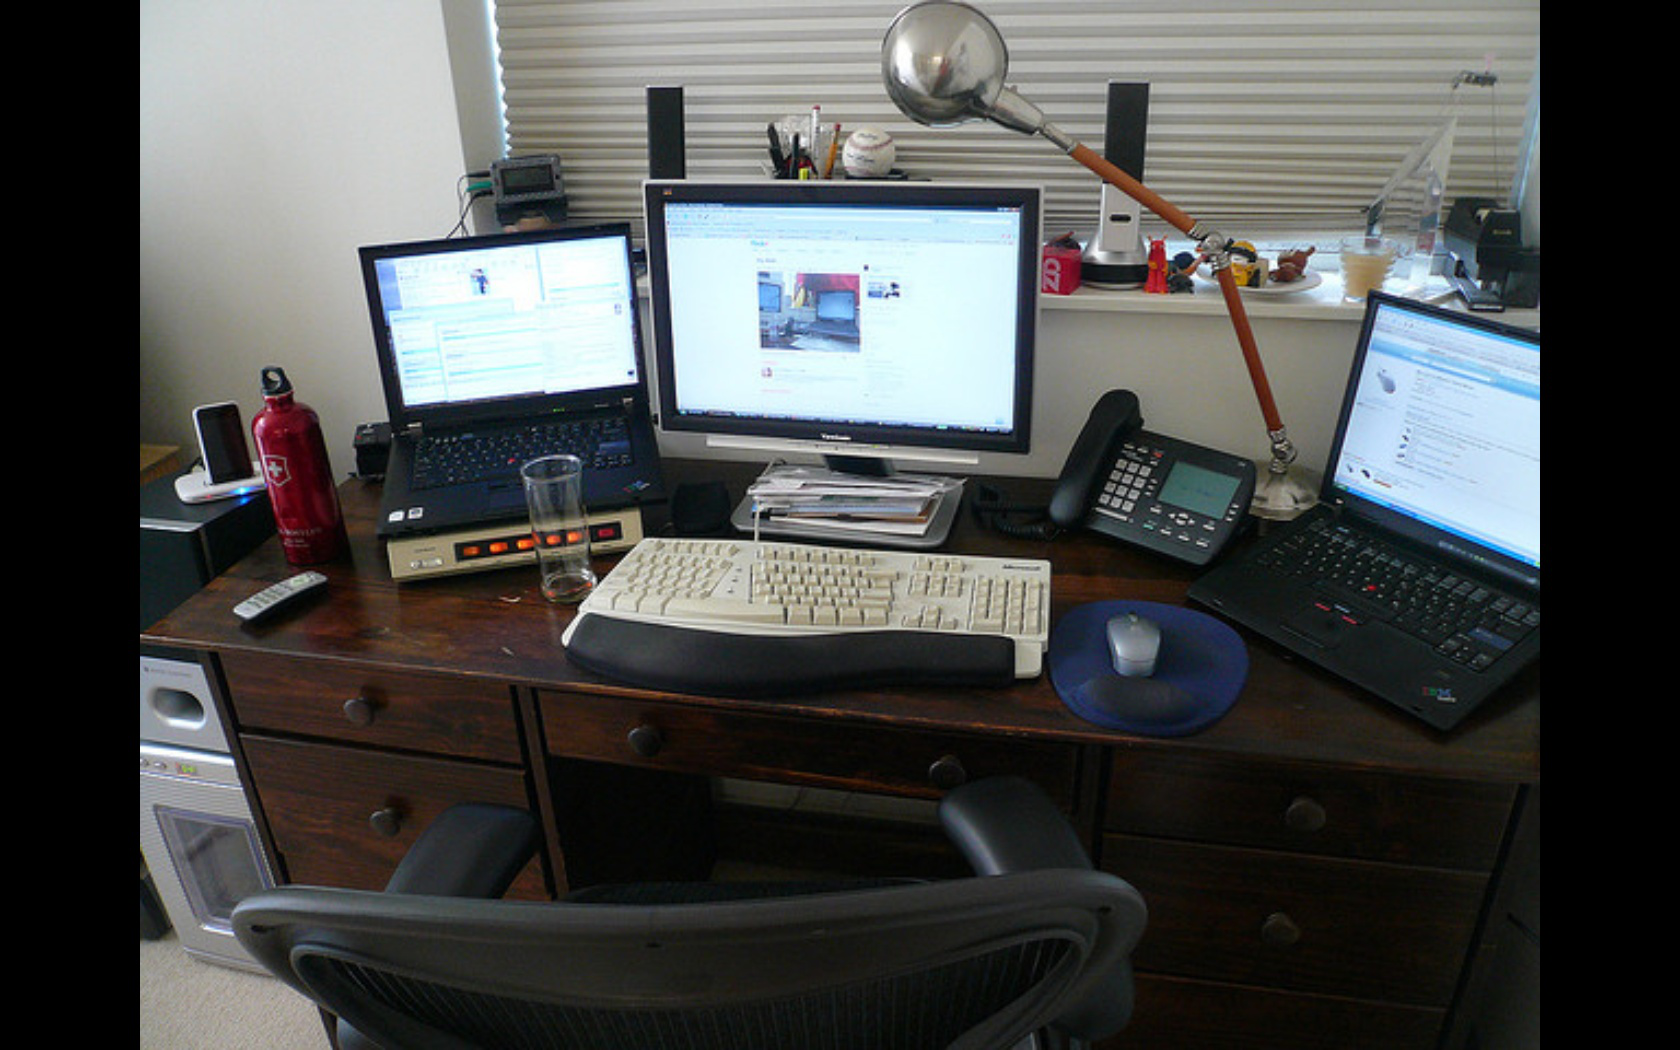

In [ ]:
im

In [ ]:
img = transform(im).unsqueeze(0)
out = model(img)

In [ ]:
out['pred_masks'].size()

torch.Size([1, 100, 200, 320])

In [ ]:
scores = out["pred_logits"].softmax(-1)[..., :-1].max(-1)[0]
# threshold the confidence
keep = scores > 0.5

In [ ]:
hola =  out['pred_logits'][0][-5].softmax(-1)[:-1].max(-1)[0]

In [ ]:
hola

tensor(0.9979)

In [ ]:
zer =  torch.tensor(0)

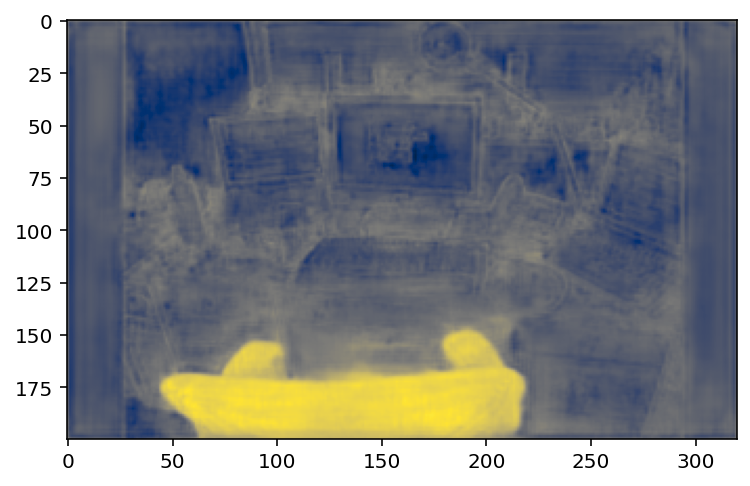

In [ ]:
plt.imshow(out['pred_masks'][0][-5], 'cividis')
plt.show()

In [ ]:
out['pred_masks'][0][-5].max()

tensor(7.9853)

In [ ]:
abc = out['pred_masks'][0][-5]

In [ ]:
mx =  abc.max()

In [ ]:
lt = []

In [ ]:
import numpy as np

In [ ]:
for a in abc:
  aux =  []
  for b in a:
    if b == mx:
      print('1')
      aux.append(0.9979)
    else:
      aux.append(0)
  lt.append(aux)

1


In [ ]:
lt = np.array(lt)

In [ ]:
lt.shape

(200, 320)

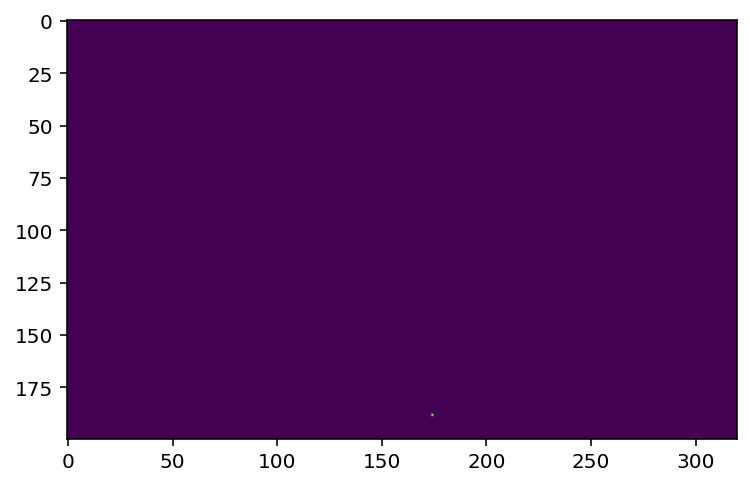

In [ ]:
plt.imshow(lt)
plt.show()

In [ ]:
out['pred_boxes'][0][-5]

tensor([0.4095, 0.8616, 0.5451, 0.2587])

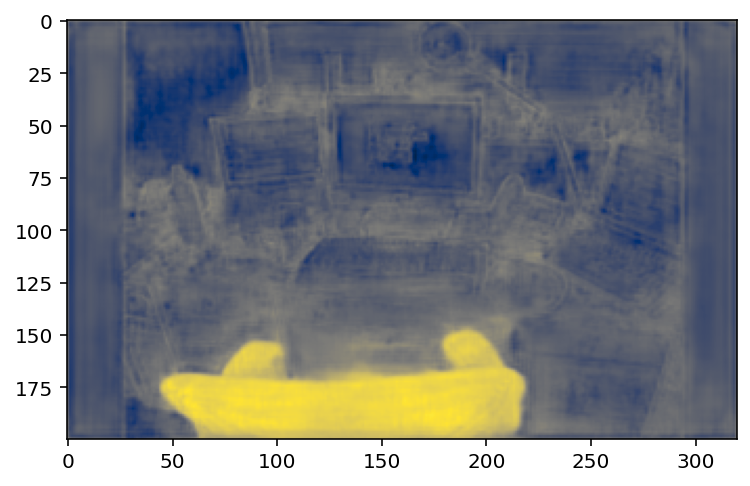

In [ ]:
plt.imshow(out['pred_masks'][0][-5], 'cividis')
plt.show()

In [ ]:
scores = out["pred_logits"].softmax(-1)[...,:-1].max(-1)[0]
scores.size()

torch.Size([1, 100])

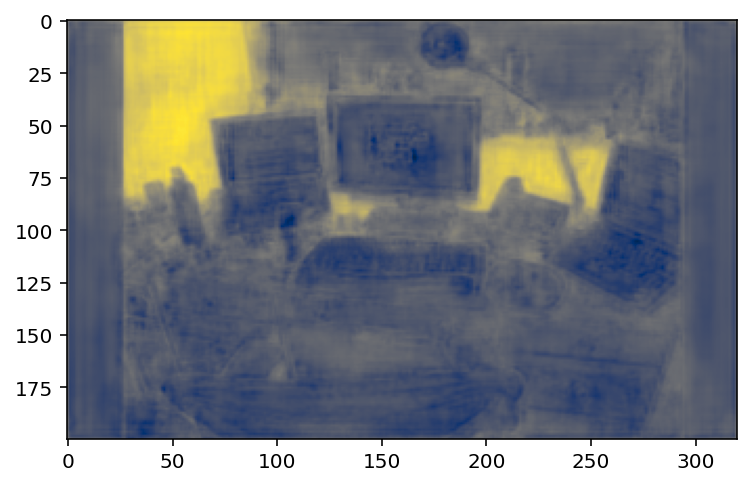

In [ ]:
plt.imshow(out['pred_masks'][0][2], 'cividis')
plt.show()

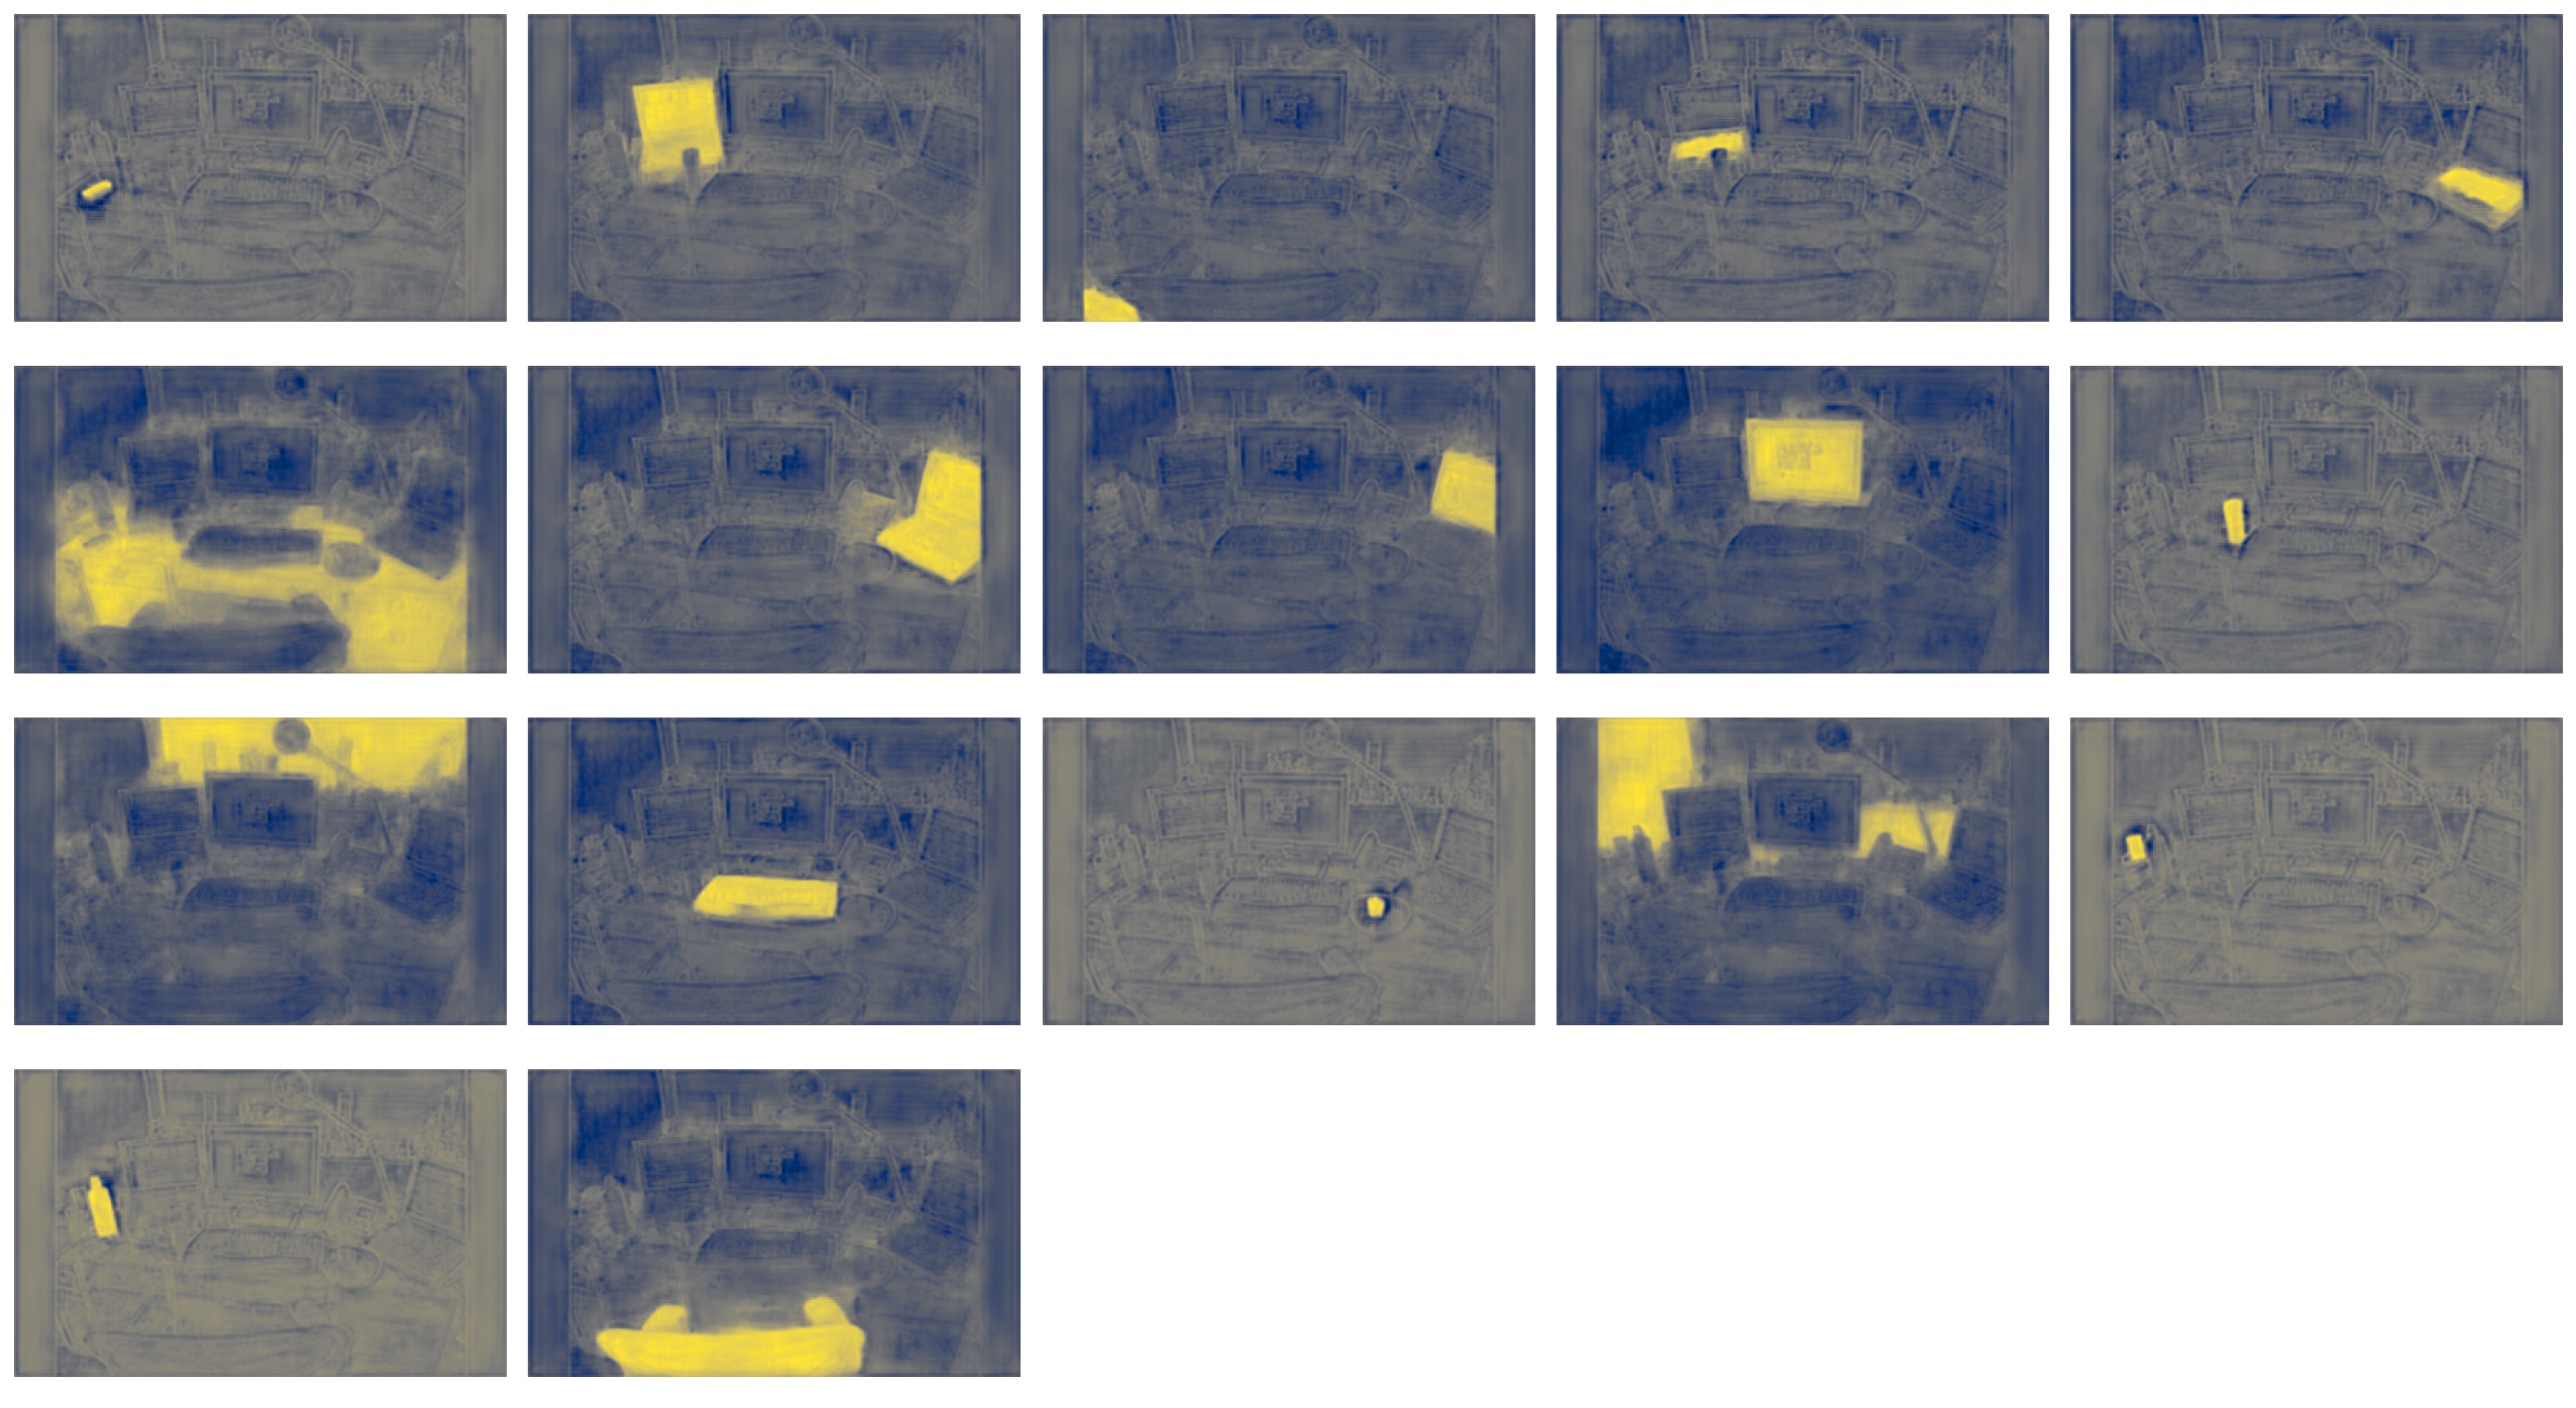

In [ ]:
scores = out["pred_logits"].softmax(-1)[..., :-1].max(-1)[0]
# threshold the confidence
keep = scores > 0.85

# Plot all the remaining masks
ncols = 5
fig, axs = plt.subplots(ncols=ncols, nrows=math.ceil(keep.sum().item() / ncols), figsize=(18, 10))
for line in axs:
    for a in line:
        a.axis('off')
for i, mask in enumerate(out["pred_masks"][keep]):
    ax = axs[i // ncols, i % ncols]
    ax.imshow(mask, cmap="cividis")
    ax.axis('off')
fig.tight_layout()

In [ ]:
! pip install git+https://github.com/cocodataset/panopticapi.git

  Cloning https://github.com/cocodataset/panopticapi.git to /tmp/pip-req-build-wsux91sp
  Running command git clone -q https://github.com/cocodataset/panopticapi.git /tmp/pip-req-build-wsux91sp
  Created wheel for panopticapi: filename=panopticapi-0.1-py3-none-any.whl size=8307 sha256=5c4533f8b95194e850246cfbad2dd74452928c658d0c4410282c42689d52a61f
  Stored in directory: /tmp/pip-ephem-wheel-cache-2jkes96m/wheels/ad/89/b8/b66cce9246af3d71d65d72c85ab993fd28e7578e1b0ed197f1
Successfully built panopticapi


In [ ]:
import panopticapi
from panopticapi.utils import id2rgb, rgb2id

In [ ]:
result = postprocessor(out, torch.as_tensor(img.shape[-2:]).unsqueeze(0))[0]

In [ ]:
import os
import shutil
import pickle
import json

In [ ]:
abc = os.listdir("/content/drive/MyDrive/processed/DCBs/LR")

In [ ]:
abc[7] = "potted plant"

In [ ]:
abc[2] = 'stop sign'

In [ ]:
abc

In [ ]:
path = "/content/drive/MyDrive/processed2/DCBs"
path1 = "/content/drive/MyDrive/processed2/DCBs/LR"
path2 = "/content/drive/MyDrive/processed2/DCBs/HR"

In [ ]:
os.mkdir(path)
os.mkdir(path1)
os.mkdir(path2)

In [ ]:
for a in abc:
  pp = path1 + "/" + a 
  os.mkdir(pp)

In [ ]:
for a in abc:
  pp = path2 + "/" + a 
  os.mkdir(pp)

In [ ]:
my_path = "/content/drive/MyDrive/"
orig = "processed/DCBs/LR/"
targ = "processed2/DCBs/LR/" 
for a in abc:
  original = my_path + orig + "tv/000000487632.pth.tar"
  target = my_path + targ + a+ "/000000487632.pth.tar"
  shutil.copy(original, target)

In [ ]:
my_path = "/content/drive/MyDrive/"
orig = "processed/DCBs/HR/"
targ = "processed2/DCBs/HR/" 
for a in abc:
  original = my_path + orig + "tv/000000487632.pth.tar"
  target = my_path + targ + a+ "/000000487632.pth.tar"
  shutil.copy(original, target)

In [ ]:
valid_path = "/content/drive/MyDrive/processed/human_scanpaths_TP_trainval_train.json"
with open(valid_path, "rb") as file:
  valid_data = json.load(file)

In [ ]:
valid_data[0]

In [ ]:
lt = []
for a in valid_data:
  if a['name'] == '000000487632.jpg':
    lt = [a]

In [ ]:
aux = []
for a in abc:
  pp = lt[0].copy()
  pp['task'] = a 
  aux.append(pp)

In [ ]:
with open("/content/final_valid.txt", "wb") as file:
  pickle.dump(aux, file)

In [ ]:
with open("/content/final_valid.txt" , "rb") as file:
  checkin = pickle.load(file)


In [ ]:
checkin

In [ ]:
with open("/content/bbox.txt", "rb") as file:
  checkin = pickle.load(file)

In [ ]:
checkin

In [ ]:
dt = {}
bbox = aux[0]['bbox']
for a in abc:
  key = a + '_' + '000000487632.jpg'
  dt[key] = bbox

In [ ]:
with open("/content/final_bbox.txt", "wb") as file:
  pickle.dump(dt, file)

In [ ]:
with open("/content/final_bbox.txt", "rb") as file:
  checkin = pickle.load(file)

checkin

In [ ]:
import numpy as np

In [ ]:
target_annos =  np.load("/content/drive/MyDrive/processed/bbox_annos.npy",allow_pickle=True).item()

In [ ]:
target_annos

{'fork_000000537944.jpg': [56, 229, 33, 49],
 'knife_000000233539.jpg': [372, 193, 114, 92],
 'tv_000000192651.jpg': [51, 138, 60, 54],
 'laptop_000000335308.jpg': [16, 210, 52, 39],
 'sink_000000164725.jpg': [158, 219, 159, 94],
 'fork_000000061672.jpg': [383, 101, 51, 141],
 'laptop_000000204979.jpg': [48, 98, 130, 101],
 'mouse_000000539056.jpg': [386, 206, 41, 44],
 'fork_000000323370.jpg': [399, 55, 65, 184],
 'tv_000000203160.jpg': [98, 57, 71, 71],
 'fork_000000256278.jpg': [16, 51, 48, 123],
 'keyboard_000000491851.jpg': [151, 201, 157, 64],
 'fork_000000169803.jpg': [346, 186, 121, 59],
 'fork_000000483837.jpg': [406, 147, 71, 171],
 'stop sign_000000249363.jpg': [425, 136, 44, 44],
 'potted plant_000000452524.jpg': [398, 55, 62, 147],
 'tv_000000159240.jpg': [321, 166, 53, 53],
 'cup_000000370652.jpg': [132, 1, 88, 95],
 'microwave_000000220096.jpg': [186, 77, 73, 37],
 'laptop_000000457705.jpg': [54, 185, 89, 53],
 'potted plant_000000171316.jpg': [210, 258, 39, 41],
 'sink_